# Analysis of the Noita Eye Cipher

 In this notebook, I will be doing some analysis on the eye ciphers found in the game Noita. This is a puzzle that has not been solved in over 2 years of work. More background information can be found [here](https://docs.google.com/document/d/1s6gxrc1iLJ78iFfqC2d4qpB9_r_c5U5KwoHVYFFrjy0/edit#). 
 
 Here, my aim is to do some frequency analysis on the cipher with the hope that it can assist in the characterization of the cipher, and also allow other to use this code to easily 

### Citations:

Cipher codes pulled from here: https://docs.google.com/document/d/1s6gxrc1iLJ78iFfqC2d4qpB9_r_c5U5KwoHVYFFrjy0/edit#

More resources for the cipher: https://docs.google.com/spreadsheets/d/1Aih_3v9BMbVI-MQQgWP51HTTplgRwXi2jRKYgyhPMao/edit#gid=0


In [21]:
# Imports (Running )
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import os

from eyecipher.cipher_message import CipherMessage

## Toggles

In [22]:
# Number of random samples to use for comparison
NUM_RANDOM_SAMPLES = 1000

### Setup our known data

In [23]:
# Define cipher file locations
base_dir = os.path.join("cipher_data", "interleaved")
east1 =  os.path.join(base_dir, "east1")
west1 =  os.path.join(base_dir, "west1")
east2 =  os.path.join(base_dir, "east2")
west2 =  os.path.join(base_dir, "west2")
east3 =  os.path.join(base_dir, "east3")
west3 =  os.path.join(base_dir, "west3")
east4 =  os.path.join(base_dir, "east4")
west4 =  os.path.join(base_dir, "west4")
east5 =  os.path.join(base_dir, "east5")

east1_message = CipherMessage(file_name = east1, name = "East 1")
west1_message = CipherMessage(file_name = west1, name = "West 1")
east2_message = CipherMessage(file_name = east2, name = "East 2")
west2_message = CipherMessage(file_name = west2, name = "West 2")
east3_message = CipherMessage(file_name = east3, name = "East 3")
west3_message = CipherMessage(file_name = west3, name = "West 3")
east4_message = CipherMessage(file_name = east4, name = "East 4")
west4_message = CipherMessage(file_name = west4, name = "West 4")
east5_message = CipherMessage(file_name = east5, name = "East 5")

combined_message = east1_message + west1_message + east2_message + \
                   west2_message + east3_message + west3_message + \
                   east4_message + west4_message + east5_message

all_messages = [east1_message,  west1_message, east2_message, \
                west2_message, east3_message, west3_message, \
                east4_message, west4_message, east5_message]

### Set up random data for analysis

In [36]:
random_trigrams = []
random_eyes = []

for i in range(NUM_RANDOM_SAMPLES):
    random_eyes.append(combined_message.shuffle_eyes())
    random_trigrams.append(combined_message.shuffle_trigrams())

all_random_eyes = random_eyes[0]
for message in random_eyes[1:]:
    all_random_eyes += message

all_random_trigrams = random_trigrams[0]
for message in random_trigrams[1:]:
    all_random_trigrams += message

### TODO: Set up known encoded mesages here

## Character Frequency Analysis

To begin, let's analyze the distribution of different eye glyphs within the message

In the encoding I am using:

- 0: Center
- 1: Up
- 2: Right
- 3: Down
- 4: Left

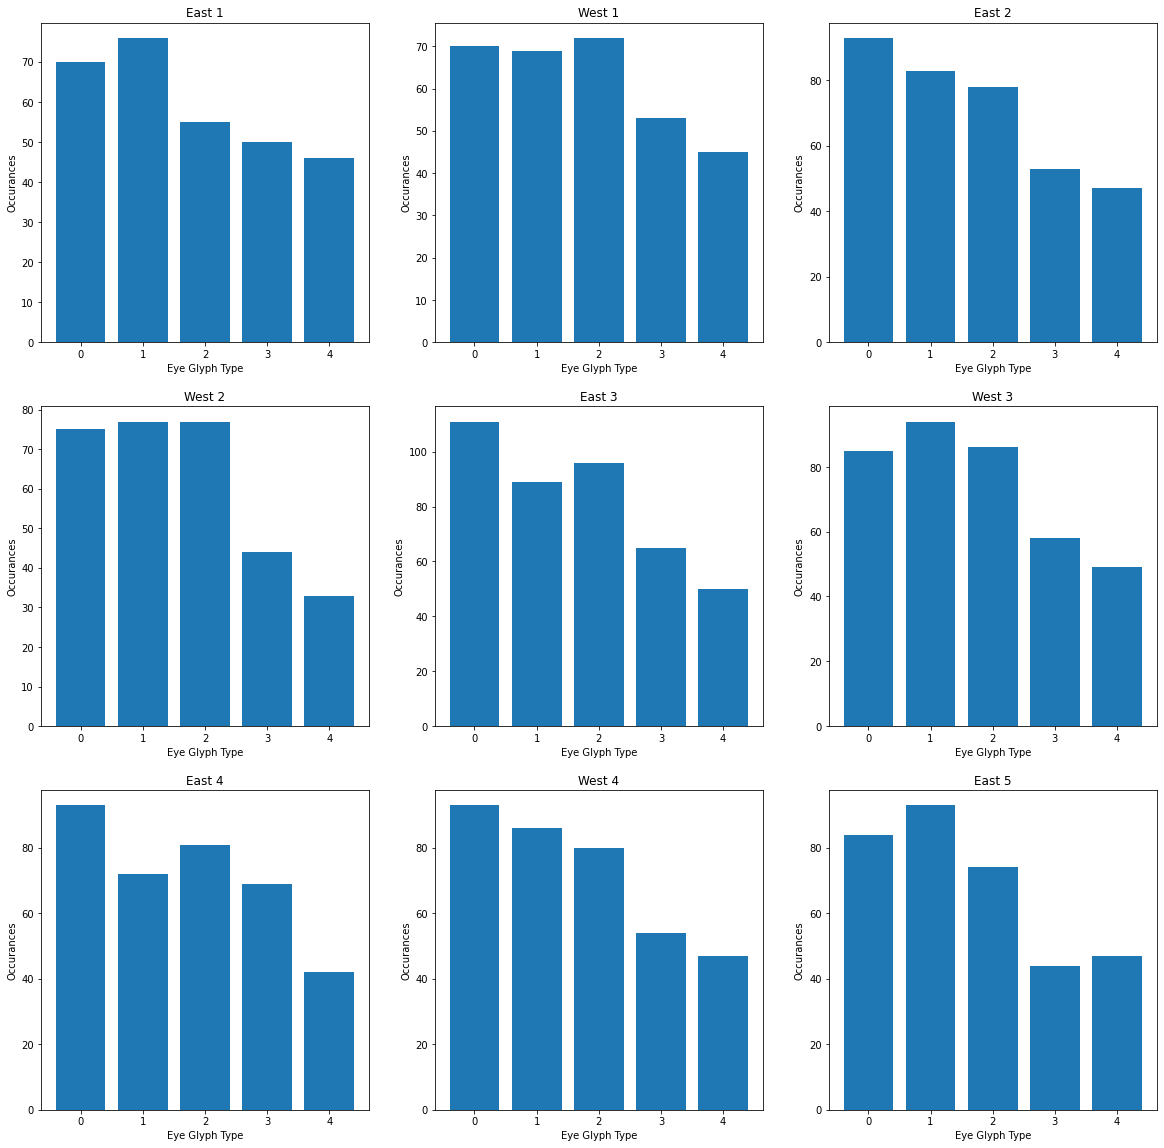

In [14]:
plt.figure(figsize=(20,20))

subplot_num = 1
for message in all_messages:
    # Grab counter data
    eyes = Counter(message.eyes)
    eyes = sorted(eyes.items())
    keys = [i[0] for i in eyes]
    vals = [i[1] for i in eyes]

    # Plot
    plt.subplot(3,3,subplot_num)
    plt.bar(keys, vals)
    plt.title(message.name)
    plt.xlabel("Eye Glyph Type")
    plt.ylabel("Occurances")
    
    subplot_num += 1


plt.show()

Let's compare the aggragate of all of the glyphs with a random distribution of eyes

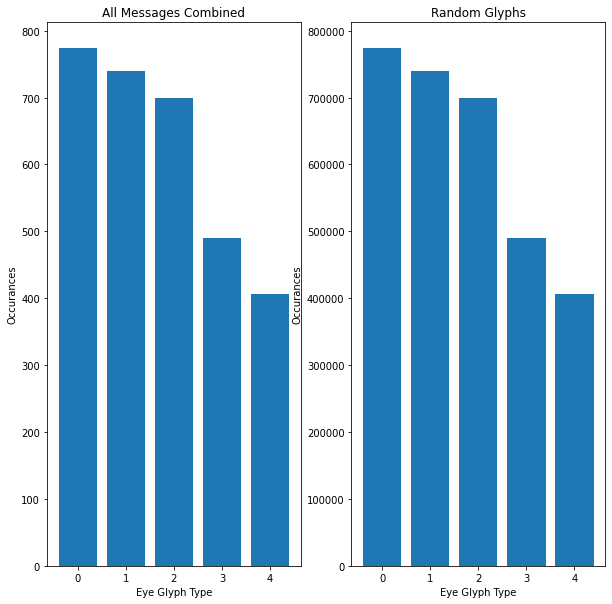

In [42]:
plt.figure(figsize=(10,10))
eyes = Counter(combined_message.eyes)
eyes = sorted(eyes.items())
keys = [i[0] for i in eyes]
vals = [i[1] for i in eyes]

# Plot
plt.subplot(1,2,1)
plt.bar(keys, vals)
plt.title("All Messages Combined")
plt.xlabel("Eye Glyph Type")
plt.ylabel("Occurances")

rand_eyes = Counter(all_random_eyes.eyes)
rand_eyes = sorted(rand_eyes.items())
rand_keys = [i[0] for i in rand_eyes]
rand_vals = [i[1] for i in rand_eyes]

# Plot
plt.subplot(1,2,2)
plt.bar(rand_keys, rand_vals)
plt.title("Random Glyphs")
plt.xlabel("Eye Glyph Type")
plt.ylabel("Occurances")

plt.show()

In [41]:
rand_eyes

[('0', 774000), ('1', 739000), ('2', 699000), ('3', 490000), ('4', 406000)]

## Bigram analysis